In [142]:
import argparse
import scanpy as sc
import plotnine as plt9
import pandas as pd
import numpy as np
import matplotlib as plt
import os
%load_ext autoreload
%autoreload 2
import anndata
import seaborn as sns
import logging
import scipy.stats
import csv

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [143]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
fpath1="/home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/data/gut-freeze003/auto-annot-121/adata/anderson_ti_freeze003_001-MT_100-cohort_Discovery.h5ad"
#fpath1="/lustre/scratch126/humgen/projects/sc-eqtl-ibd/analysis/freeze_003/ti-cd_healthy-auto_processed_v001-labels_freeze_v003/2022-12-15_DGE/auto-annot-121/anderson_ti_freeze003_001-MT_100-cohort_Discovery.h5ad"
adata1=sc.read(fpath1)  

fpath2="/home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/data/gut-freeze003/auto-annot-121/adata/anderson_ti_freeze003_001-MT_100-cohort_Replication.h5ad"
#fpath2="/lustre/scratch126/humgen/projects/sc-eqtl-ibd/analysis/freeze_003/ti-cd_healthy-auto_processed_v001-labels_freeze_v003/2022-12-15_DGE/auto-annot-121/anderson_ti_freeze003_001-MT_100-cohort_Replication.h5ad"
adata2=sc.read(fpath2) 

In [145]:
#celltype_genes=['EPCAM']
#sc.pl.dotplot(adata1, celltype_genes, groupby='predicted_celltype',
#                  gene_symbols='gene_symbols', 
#              dendrogram=False,
#                  standard_scale='var')

In [146]:
#'patient_id',     
#'experiment_id',
vec=[  # Sample metadata
    'sanger_sample_id', 
     'disease_status',
     'biopsy_type', 
     'age_imputed',    
     'sex',
     'inflammation_status',
     'smoking_status',    
    'bead_version',
      'bead_lot',
    'chip_version',
    'chip_lot',   
    'lane', 
     'enzyme_lot_blp', 
     'gem_lot',  
     'early_late_ratio',

     'log1p_n_genes_by_counts',  # QC metrics
     'log1p_total_counts',
      'n_genes_by_counts',
       'normalization_factor', 
      'pct_counts_gene_group__mito_transcript',
        'cell_passes_qc' , 
   
       'scrublet__multiplet_scores',  # Multiplet information
       'scrublet__predicted_multiplet', 
        
       #'label__machine',
       'predicted_celltype', #Cell annotations
       'predicted_celltype_probability'


   #   'smoker_at_time_of_biopsy',
   #   'smoking_status',    
   #  'inflammation_status_grouped', 
   #   'medications_details',    
  #  'bead_version',  # Sample processing information
  #  'chip_version',
  #  'lane',
   # 'batch',  
   # 'bead_lot',
   # 'chip_lot', 
   # 'id_run',    
   # 'library_id',
   # 'protocol', 
   # 'early_late_ratio',
   # 'early_late_ratio_float', 
   #  'enzyme_lot_blp', 
   #  'gem_lot',   
   # 'hours_to_chromium_processing', 
   # 'time_to_chromium_processing', 
   #  'late_early_ratio',
   #  'late_early_ratio_float',
   # 'date_of_sample', 
   #  'season_sample_collected',  
   #  'month_sample_collected',
       ]

In [147]:
adata1.obs=adata1.obs[vec].copy()
adata2.obs=adata2.obs[vec].copy()

In [148]:
#df1=adata1.obs[['sanger_sample_id', "disease_status"]].drop_duplicates().reset_index().drop(columns="index")
#df2=adata2.obs[['sanger_sample_id', "disease_status"]].drop_duplicates().reset_index().drop(columns="index")
#df3=pd.concat([df1, df2])
#df3['disease_status']=df3['disease_status'].replace({'cd': 'CD', 'healthy': 'H'})
#id_count = {'CD':0, 'H':0}
#list_of_ids = []
#for index, row in df3.iterrows():
#    if row['disease_status'] in id_count:
#        key = row['disease_status']
#        list_of_ids.append(f"{key}{id_count[key] + 1}")
#        id_count[key] = id_count[key] + 1
#df3['sample_id'] = list_of_ids
#df3=df3.drop(columns="disease_status")
#df3

#adata1.obs=adata1.obs.merge(df3, left_on='sanger_sample_id', right_on='sanger_sample_id').copy()
#adata2.obs=adata2.obs.merge(df3, left_on='sanger_sample_id', right_on='sanger_sample_id').copy()

#adata1.obs.drop(columns="sanger_sample_id", inplace=True)
#adata2.obs.drop(columns="sanger_sample_id", inplace=True)

AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …
AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …
... storing 'predicted_celltype' as categorical
... storing 'category' as categorical
... storing 'label' as categorical
... storing 'label__machine' as categorical
... storing 'category__machine' as categorical


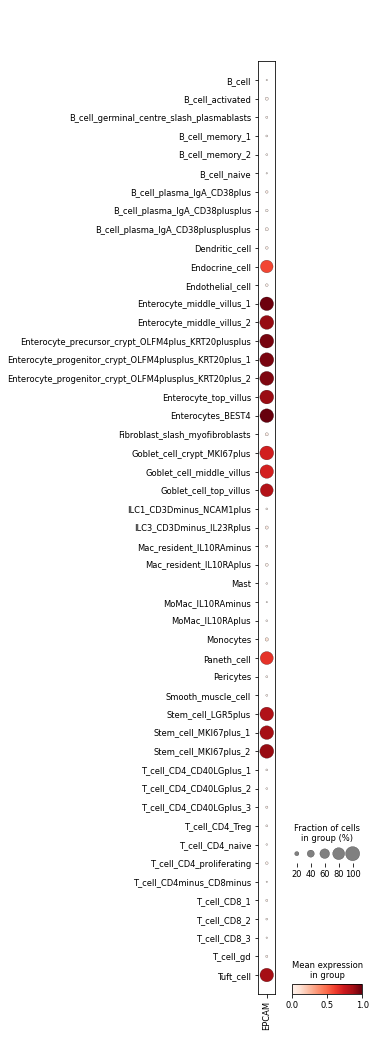

In [149]:
# Add newest annotation
fpath="/home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/clean_annotation/data-clean_annotation-full.csv"
df5=pd.read_table(fpath, sep=',')
df5
df5=df5[['category', 'label','label__machine', 'category__machine', 'label__machine_retired']]
df5.rename(columns={'label__machine_retired':'predicted_celltype'}, inplace=True)

adata1.obs=adata1.obs.merge(df5, how='left', on='predicted_celltype').copy()
adata2.obs=adata2.obs.merge(df5, how='left', on='predicted_celltype').copy()

celltype_genes=['EPCAM']
sc.pl.dotplot(adata1, celltype_genes, groupby='predicted_celltype',
                  gene_symbols='gene_symbols', 
              dendrogram=False,
                  standard_scale='var')

adata1.obs.drop(['predicted_celltype'],axis=1, inplace=True)
adata2.obs.drop(['predicted_celltype'],axis=1, inplace=True)

adata1.obs.rename(columns={"category":"major_cell_type", "label":"predicted_celltype"}, inplace=True)
adata2.obs.rename(columns={"category":"major_cell_type", "label":"predicted_celltype"}, inplace=True)

In [150]:
#sample_id1=adata1.obs.sample_id
#sample_id2=adata2.obs.sample_id

#adata1.obs.drop(columns=['sample_id'],axis=1, inplace=True)
#adata2.obs.drop(columns=['sample_id'],axis=1, inplace=True)

#adata1.obs.insert(0, "sample_id", sample_id1)
#adata2.obs.insert(0, "sample_id", sample_id2)

In [151]:
adata1.obs['disease_status']=adata1.obs['disease_status'].replace({'cd': "Crohn's disease", 'healthy': 'Healthy'})
adata2.obs['disease_status']=adata2.obs['disease_status'].replace({'cd': "Crohn's disease", 'healthy': 'Healthy'})

adata1.obs['biopsy_type']=adata1.obs['biopsy_type'].replace({'TI': "terminal ileum"})
adata2.obs['biopsy_type']=adata2.obs['biopsy_type'].replace({'TI': "terminal ileum"})

adata1.obs.gem_lot.replace('UNKNOWN_GEM_1', np.nan, inplace=True)
adata2.obs.gem_lot.replace('UNKNOWN_GEM_1', np.nan, inplace=True)

adata1.obs.rename(columns={"early_late_ratio": "f1_f2_ratio"}, inplace=True)
adata2.obs.rename(columns={"early_late_ratio": "f1_f2_ratio"}, inplace=True)

adata1.obs.rename(columns={"age_imputed":"age"}, inplace=True)
adata2.obs.rename(columns={"age_imputed":"age"}, inplace=True)

#Doesnt work 
#adata1.obs['f1_f2_ratio']=adata1.obs['f1_f2_ratio'].astype('str')
#adata2.obs['f1_f2_ratio']=adata2.obs['f1_f2_ratio'].astype('str')

#adata1.obs.f1_f2_ratio.replace('nan', 'no_fractionation', inplace=True)
#adata2.obs.f1_f2_ratio.replace({'nan':'no_fractionation'}, inplace=True)

In [152]:
# We need to fill medication class from another sample phenotype metadata spreadsheet
fpath="/home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/manuscript/ti_atlas_code/figures/data/GUT_scRNAseq-cleaned.csv"
meta=pd.read_csv(fpath, sep=',')
meta=meta[['sanger_sample_id', 'medication_class']]
meta1=meta[meta.sanger_sample_id.isin(adata1.obs.sanger_sample_id.drop_duplicates().values)]
meta2=meta[meta.sanger_sample_id.isin(adata2.obs.sanger_sample_id.drop_duplicates().values)]


In [153]:
adata1.obs=adata1.obs.merge(meta1, how='left', on='sanger_sample_id')
adata1.obs['medication_class'].replace('Anti-TNF (adalimumab-infliximab-golimumab)', 'Anti-TNF', inplace=True)
adata1.obs['medication_class'].replace('Immunosuppressants (azathioprine-mercaptopurine-methotrexate)', 'Immunosuppressants', inplace=True)
adata1.obs['medication_class'].replace('Anti-TNF+Immunosuppressant', 'Anti-TNF + Immunosuppressants', inplace=True)
adata1.obs['medication_class'].replace('Corticosteriods (prednisolone-budesonide)', 'Corticosteriods', inplace=True)
adata1.obs['medication_class'].replace('5-ASA drugs (mesalazine)', '5-ASA drugs', inplace=True)

adata2.obs=adata2.obs.merge(meta2, how='left', on='sanger_sample_id')
adata2.obs['medication_class'].replace('Anti-TNF (adalimumab-infliximab-golimumab)', 'Anti-TNF', inplace=True)
adata2.obs['medication_class'].replace('Immunosuppressants (azathioprine-mercaptopurine-methotrexate)', 'Immunosuppressants', inplace=True)
adata2.obs['medication_class'].replace('Anti-TNF+Immunosuppressant', 'Anti-TNF + Immunosuppressants', inplace=True)
adata2.obs['medication_class'].replace('Corticosteriods (prednisolone-budesonide)', 'Corticosteriods', inplace=True)
adata2.obs['medication_class'].replace('5-ASA drugs (mesalazine)', '5-ASA drugs', inplace=True)

AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …
AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …


In [154]:
adata1.obs['disease_status__machine']=adata1.obs['disease_status'].replace({"Crohn's disease": "CD", 'Healthy': 'H'})
adata2.obs['disease_status__machine']=adata2.obs['disease_status'].replace({"Crohn's disease": "CD", 'Healthy': 'H'})

In [155]:
#Reorder metadata columns
v1=[
    'sanger_sample_id', 
    'disease_status', 
    'sex', 
    'age', 
    'inflammation_status',
    'medication_class', 
    'smoking_status',
    'bead_version',
      'bead_lot',
    'chip_version',
    'chip_lot',   
    'lane', 
     'enzyme_lot_blp', 
     'gem_lot',  
     'f1_f2_ratio' ]

# Save metadata
df1=adata1.obs[v1].copy()
df2=adata2.obs[v1].copy()

df1=df1.reset_index()
df2=df2.reset_index()

df1=df1.drop(columns=['index']).drop_duplicates()
df2=df2.drop(columns=['index']).drop_duplicates()

df1['cohort']="Discovery"
df2['cohort']="Replication"

sample_metadata=pd.concat([df1, df2])

sample_metadata=sample_metadata[["cohort"] + v1]
sample_metadata.sort_values(['cohort', 'disease_status'], ascending=[True, False], inplace=True)

sample_metadata.f1_f2_ratio.replace(np.nan, 'no_fractionation', inplace=True)

sample_metadata.to_csv("version_v4/sample_metadata.csv", sep=",", index=False) 

In [156]:
#meta1['order']=meta1.sample_id.str.extract('(\d+)',  expand = True)
#meta2['order']=meta2.sample_id.str.extract('(\d+)',  expand = True)
#meta1['order']=pd.to_numeric(meta1.order)
#meta2['order']=pd.to_numeric(meta2.order)

In [157]:
#meta1=meta1.groupby(['disease_status']).apply(lambda x: x.sort_values(["order"], ascending = True)).reset_index(drop=True)
#meta2=meta2.groupby(['disease_status']).apply(lambda x: x.sort_values(["order"], ascending = True)).reset_index(drop=True)

In [158]:
#meta1.drop(columns="order", inplace=True)
#meta2.drop(columns="order", inplace=True)

In [159]:
#meta1.to_csv("Discovery_metadata.csv", sep=",", index=False) 
#meta2.to_csv("Replication_metadata.csv", sep=",", index=False)

... storing 'sanger_sample_id' as categorical
... storing 'disease_status' as categorical
... storing 'medication_class' as categorical
... storing 'disease_status__machine' as categorical


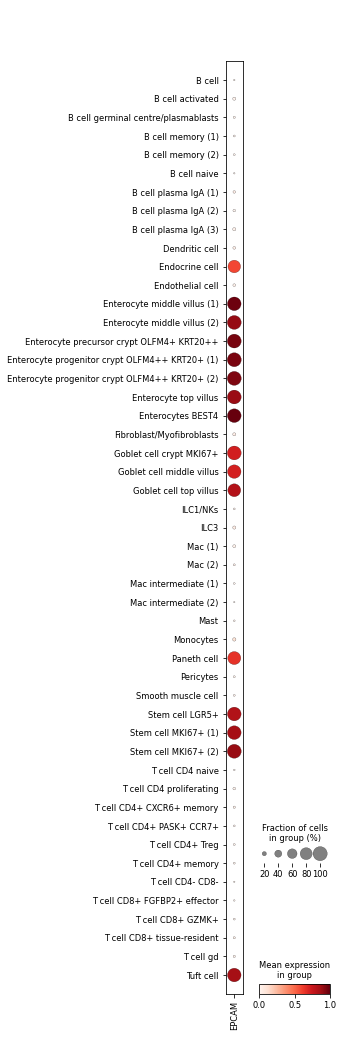

In [160]:
celltype_genes=['EPCAM']
sc.pl.dotplot(adata1, celltype_genes, groupby='predicted_celltype',
                  gene_symbols='gene_symbols', 
              dendrogram=False,
                  standard_scale='var')

In [1]:
# Save datasets

In [161]:
adata1.write(
        'version_v4/Discovery_cohort.h5ad',
        compression='gzip'
        #compression_opts=9  # takes ages, but we want a small file for system
)

In [162]:
adata2.write(
        'version_v4/Replication_cohort.h5ad',
        compression='gzip'
        #compression_opts=9  # takes ages, but we want a small file for system
)

... storing 'sanger_sample_id' as categorical
... storing 'disease_status' as categorical
... storing 'major_cell_type' as categorical
... storing 'predicted_celltype' as categorical
... storing 'label__machine' as categorical
... storing 'category__machine' as categorical
... storing 'medication_class' as categorical
... storing 'disease_status__machine' as categorical


In [28]:
#fpath1="/home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/manuscript/ti_atlas_code/zenodo/Discovery_cohort-CellAtlas.h5ad"
#fpath1="/lustre/scratch126/humgen/projects/sc-eqtl-ibd/analysis/freeze_003/ti-cd_healthy-auto_processed_v001-labels_freeze_v003/2022-12-15_DGE/auto-annot-121/anderson_ti_freeze003_001-MT_100-cohort_Discovery.h5ad"
#check1=sc.read(fpath1)  


In [10]:
#sc.pp.highly_variable_genes(check1)
#sc.pp.scale(check1, max_value=10)
#sc.tl.pca(check1, svd_solver='arpack')
#sc.pp.neighbors(check1, n_neighbors=153, n_pcs=29)
#sc.tl.umap(check1)
#sc.pl.umap(check1, color=['major_cell_type'])
